In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('MarketData.csv')

Text(0.5, 1.0, 'Stock opening Price')

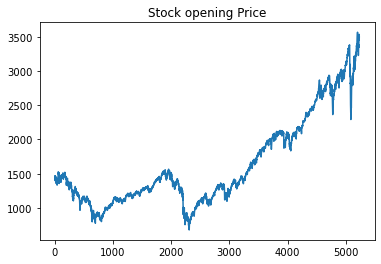

In [4]:
df['Open'].plot(label = 'Opening')
plt.title('Stock opening Price')

Text(0.5, 1.0, 'Stock opening Price')

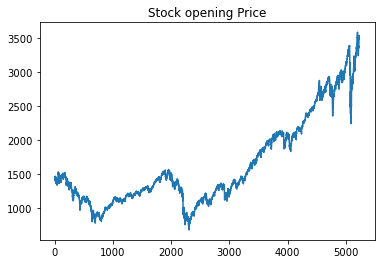

In [5]:
df['Close'].plot(label = 'Opening')
plt.title('Stock opening Price')

Text(0.5, 1.0, 'Stock opening Price')

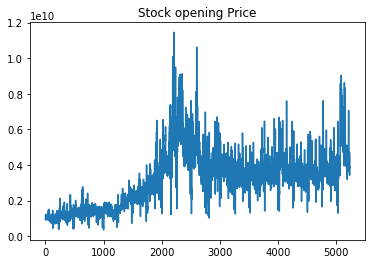

In [6]:
df['Volume'].plot(label = 'Opening')
plt.title('Stock opening Price')

In [7]:
def append_date(df):    # Appending year, month and day column
    data = df
    data['date'] = pd.to_datetime( data.Date )
    data['year'], data['month'], data['day'] = data['date'].dt.year, \
                                               data['date'].dt.month, \
                                               data['date'].dt.day
    num_of_yrs   = np.size( np.where( ( np.unique( data['year'].values ))))
    data.iloc[:,0] = pd.to_datetime( data.iloc[:,0] )
    del data['date']
    return data, num_of_yrs
Data_datetime, num_of_years= append_date(df)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
5227,2020-10-12,3500.020020,3549.850098,3499.610107,3534.219971,3534.219971,3428970000,2020,10,12
5228,2020-10-13,3534.010010,3534.010010,3500.860107,3511.929932,3511.929932,3605150000,2020,10,13
5229,2020-10-14,3515.469971,3527.939941,3480.550049,3488.669922,3488.669922,3840630000,2020,10,14
5230,2020-10-15,3453.719971,3489.080078,3440.889893,3483.340088,3483.340088,3717640000,2020,10,15
5231,2020-10-16,3493.500000,3515.760010,3480.449951,3483.810059,3483.810059,4675890000,2020,10,16


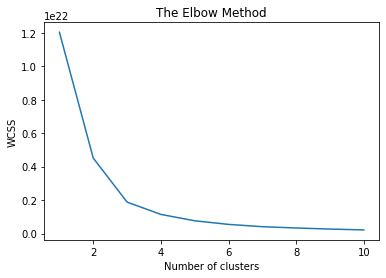

In [8]:
#Find the optimal number of clusters for daily valume data by Elbow Method.
X = df.iloc[: , 6:8].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

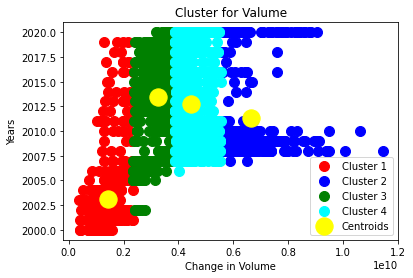

In [9]:
#As seen from figure elbow bending after 4 so selecting 4 clusters as optimal numbers of clusters. 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster for Valume')
plt.xlabel('Change in Volume')
plt.ylabel('Years')
plt.legend()
plt.show()

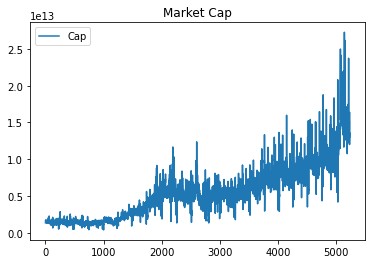

In [10]:
df['MarketCap'] = df['Open']*df['Volume']
df['MarketCap'].plot(label = 'Cap')
plt.title('Market Cap')
plt.legend()

<AxesSubplot:>

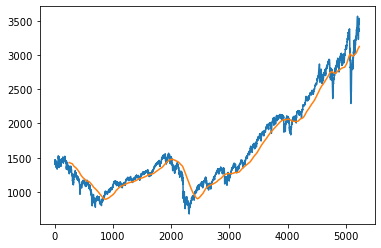

In [11]:
df['MAOPEN'] = df['Open'].rolling(250).mean()
df['Open'].plot()
df['MAOPEN'].plot()

<AxesSubplot:>

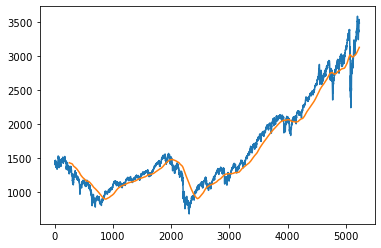

In [12]:
df['MACLOSE'] = df['Close'].rolling(250).mean()
df['Close'].plot()
df['MACLOSE'].plot()

<AxesSubplot:>

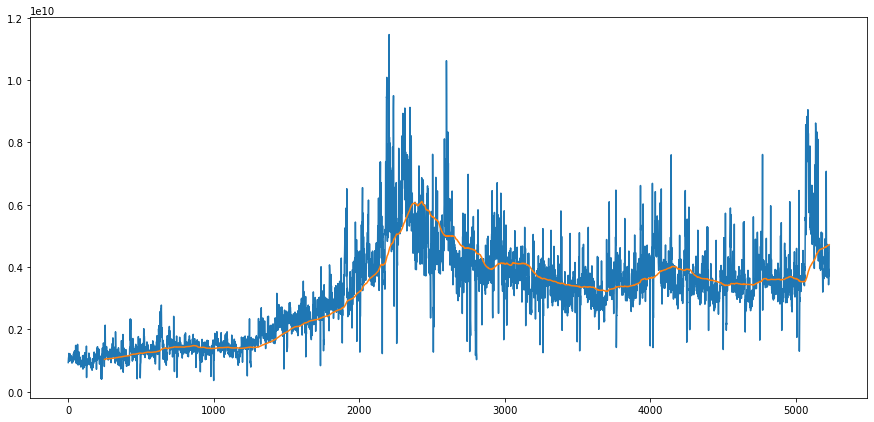

In [13]:
df['MAVolume'] = df['Volume'].rolling(250).mean()
df['Volume'].plot(figsize = (15,7))
df['MAVolume'].plot()

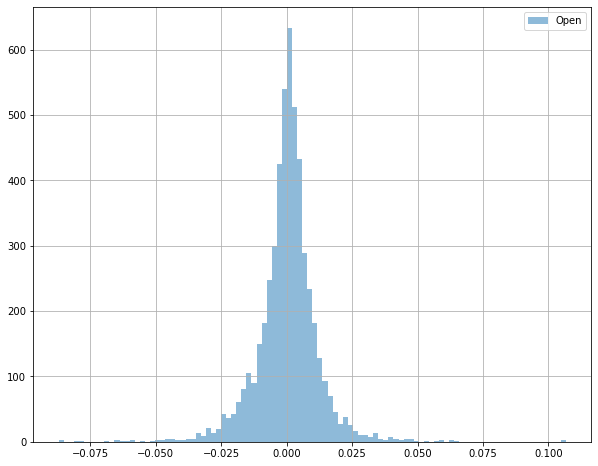

In [14]:
#Parameter1- fractional difference between current day open and previous day open
df['Parameter1'] = (df['Open']/df['Open'].shift(1)) -1
df['Parameter1'].hist(bins = 100, label = 'Open', alpha = 0.5, figsize = (10,8))
plt.legend()

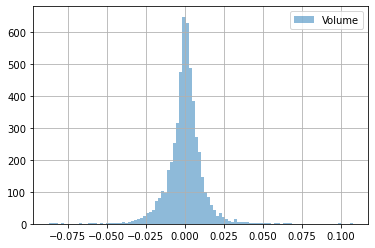

In [15]:
#Parameter 2 -  fractional difference between current day open and current day close
df['Parameter2'] = (df['Close']/df['Open'])-1
df['Parameter2'].hist(bins = 100, label = 'Volume', alpha = 0.5)
plt.legend()

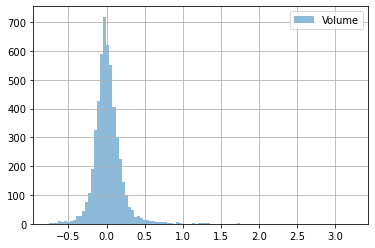

In [16]:
#Parameter 3 - fractional difference between current day volume and previous day volume
df['Parameter3'] = (df['Volume']/df['Volume'].shift(1)) - 1
df['Parameter3'].hist(bins = 100, label = 'Volume', alpha = 0.5)
plt.legend()

In [17]:
df.head(12)

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,MarketCap,MAOPEN,MACLOSE,MAVolume,Parameter1,Parameter2,Parameter3
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,2000,1,3,1.369047e+12,NaN,NaN,NaN,NaN,-0.009549,NaN
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,2000,1,4,1.468317e+12,NaN,NaN,NaN,-0.009549,-0.038345,0.082850
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,2000,1,5,1.519070e+12,NaN,NaN,NaN,-0.038345,0.001922,0.075818
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,2000,1,6,1.531525e+12,NaN,NaN,NaN,0.001922,0.000956,0.006264
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,2000,1,7,1.719507e+12,NaN,NaN,NaN,0.000956,0.027090,0.121670
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,2000,1,10,1.534877e+12,NaN,NaN,NaN,0.027090,0.011190,-0.130917
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000,2000,1,11,1.478006e+12,NaN,NaN,NaN,0.011190,-0.013063,-0.047708
7,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,1432.250000,974600000,2000,1,12,1.402021e+12,NaN,NaN,NaN,-0.013063,-0.004386,-0.038856
8,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1449.680054,1030400000,2000,1,13,1.475790e+12,NaN,NaN,NaN,-0.004386,0.012170,0.057254
9,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1465.150024,1085900000,2000,1,14,1.574208e+12,NaN,NaN,NaN,0.012170,0.010671,0.053863


In [18]:
X_Para = df.iloc[: , 14:17 ]
X_Para

,Parameter1,Parameter2,Parameter3
0,NaN,-0.009549,NaN
1,-0.009549,-0.038345,0.082850
2,-0.038345,0.001922,0.075818
3,0.001922,0.000956,0.006264
4,0.000956,0.027090,0.121670
...,...,...,...
5227,0.011663,0.009771,-0.129495
5228,0.009711,-0.006248,0.051380
5229,-0.005246,-0.007623,0.065318
5230,-0.017565,0.008576,-0.032023


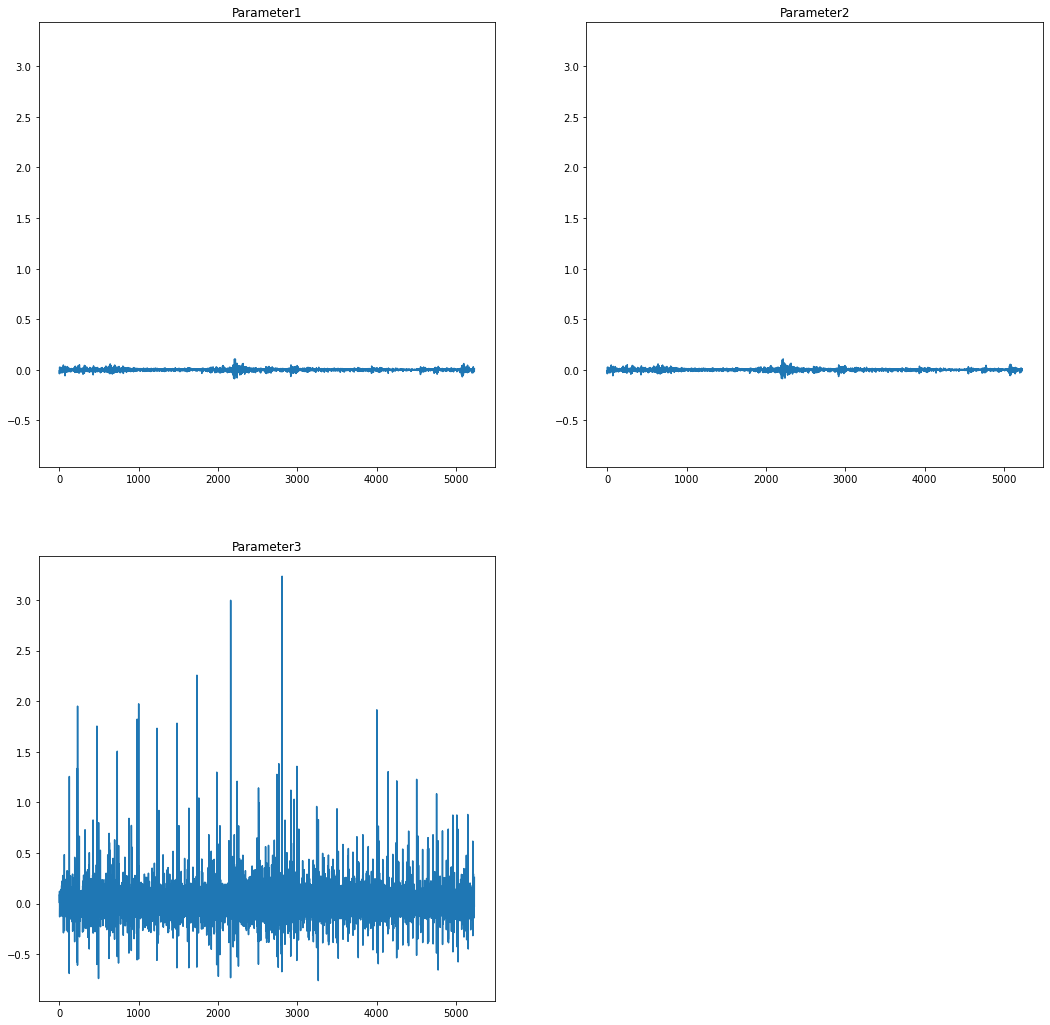

In [19]:
plt.figure(figsize=(18,18))
ax1 = plt.subplot(221)
plt.plot(X_Para['Parameter1'][:])
plt.title('Parameter1')
plt.subplot(222, sharey=ax1)
plt.plot(X_Para['Parameter2'][:])
plt.title('Parameter2')
plt.subplot(223, sharey=ax1)
plt.plot(X_Para['Parameter3'][:])
plt.title('Parameter3')
plt.show()

Clustering of parameters.
What we can see from these two stocks is that we have different scalesbetween the price movements.
This means we need to do a normalization step before we apply k-means clustering. If we don't do this the algorithm would just cluster based on the price of the stock.
To do this we're going to use Normalizer() from sklearn.preprocessing, and then we'll print out the new minimum movement value, the maximum, and the mean

In [20]:
X_Para = X_Para.fillna(0)
X_Para = np.asarray([np.asarray(X_Para['Parameter1']),np.asarray(X_Para['Parameter2']),np.asarray(X_Para['Parameter3'])]).T

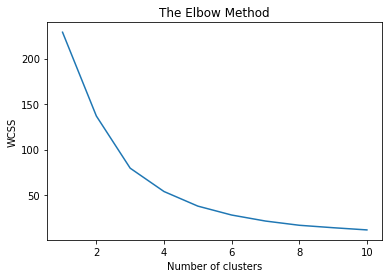

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_Para)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

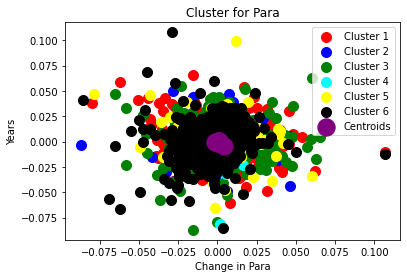

In [22]:
#As seen from figure elbow bending after 4 so selecting 4 clusters as optimal numbers of clusters. 
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_Para)
plt.scatter(X_Para[y_kmeans == 0, 0], X_Para[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_Para[y_kmeans == 1, 0], X_Para[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_Para[y_kmeans == 2, 0], X_Para[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_Para[y_kmeans == 3, 0], X_Para[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_Para[y_kmeans == 4, 0], X_Para[y_kmeans == 4, 1], s = 100, c = 'yellow', label = 'Cluster 5')
plt.scatter(X_Para[y_kmeans == 5, 0], X_Para[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'purple', label = 'Centroids')
plt.title('Cluster for Para')
plt.xlabel('Change in Para')
plt.ylabel('Years')
plt.legend()
plt.show()

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(3)
pca.fit(X_Para)

PCA(n_components=3)

In [25]:
pca_data = pd.DataFrame(pca.transform(X_Para))
print(pca_data.head())

          0         1         2
0 -0.018278  0.005188  0.008276
1  0.064661  0.013190  0.037288
2  0.057576 -0.033089  0.019735
3 -0.012043  0.000969 -0.001553
4  0.103298 -0.014308 -0.023128


In [26]:
clusters = 6
from matplotlib import colors as mcolors
import math
colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                      ).items())))[1]
  
  
# number of steps to taken generate n(clusters) colors
skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]

TypeError: text() missing 1 required positional argument: 's'

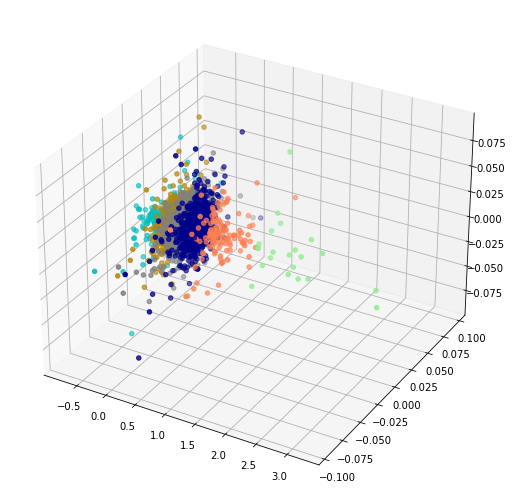

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2], 
           c = list(map(lambda label : cluster_colors[label],kmeans.labels_)))
    
list(map(lambda data1, data2, data3:
        ax.text(data1, data2, data3, size = 16.5,
        zorder = 20, color = 'k'), pca_data[0], pca_data[1],
        pca_data[2]))
  
plt.show()